# Bootcamp dag 6 - Statistics

### Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from pandas.plotting import scatter_matrix

### Read and show data

In [2]:
data = pd.read_csv("airlinesatisfaction.csv")
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Drop the unneccesary columns

In [3]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Change the types of strings to ints

In [18]:
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({"Loyal Customer": 0, "disloyal Customer": 1}, inplace = True)
data['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1}, inplace = True)
data['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2}, inplace = True)
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)


# Apparently there are nan cells in this column -> change them with the mean
gem_arr = data['Arrival Delay in Minutes'].mean()
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(gem_arr)

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Customer Type'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Type of Travel'}>,
        <AxesSubplot:title={'center':'Class'}>],
       [<AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <A

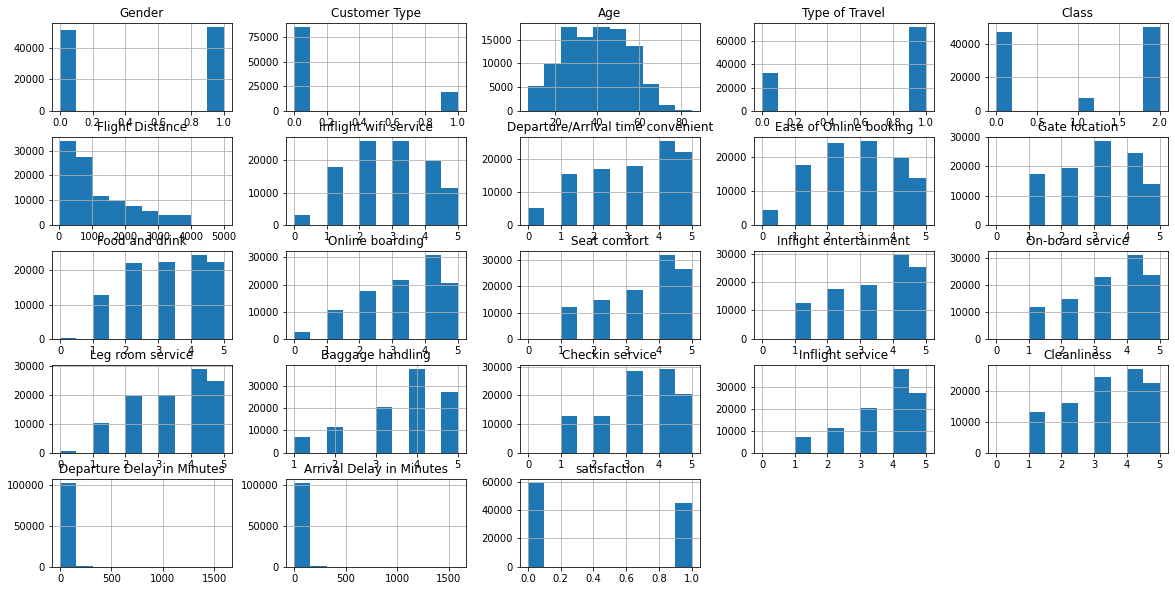

In [5]:
data.hist(figsize=(20,10))

### Variables that we can use later on

In [6]:
age = data["Age"]
flight_distance = data["Flight Distance"]
departure = data["Departure Delay in Minutes"]
arrival = data["Arrival Delay in Minutes"]



### Boxplots

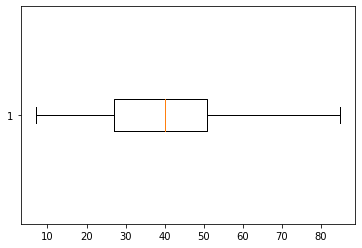

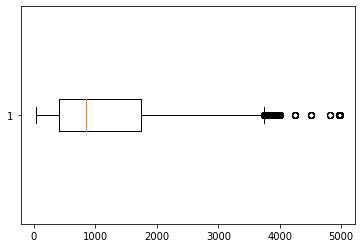

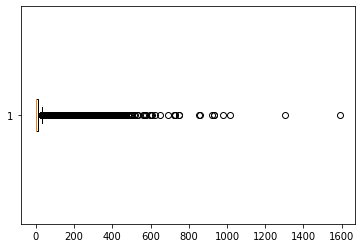

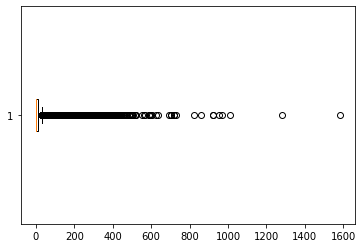

count    103904.000000
mean         15.178678
std          38.640909
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64


In [7]:
plt.boxplot(age, vert=False)
plt.show()

plt.boxplot(flight_distance, vert=False)
plt.show()

plt.boxplot(departure, vert=False)
plt.show()

plt.boxplot(arrival, vert=False)
plt.show()

print(arrival.describe())


### Z-scores

0        -1.745279
1        -0.951360
2        -0.885200
3        -0.951360
4         1.430397
            ...   
103899   -1.083680
103900    0.636478
103901   -0.620561
103902   -1.149840
103903   -0.819040
Name: Age, Length: 103904, dtype: float64


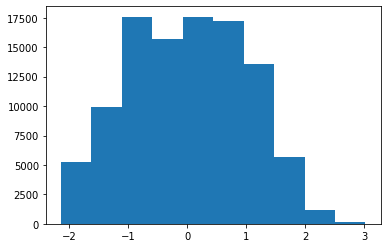

0        -0.731539
1        -0.957184
2        -0.047584
3        -0.629246
4        -0.978244
            ...   
103899   -1.000307
103900    1.160869
103901    0.807860
103902   -0.189991
103903    0.535081
Name: Flight Distance, Length: 103904, dtype: float64


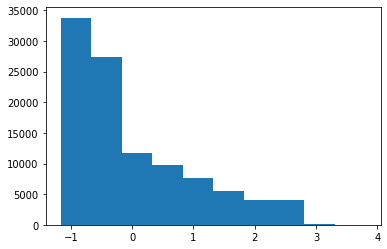

0         0.266393
1        -0.361375
2        -0.387532
3        -0.099805
4        -0.387532
            ...   
103899   -0.309061
103900   -0.387532
103901   -0.204433
103902   -0.387532
103903   -0.387532
Name: Departure Delay in Minutes, Length: 103904, dtype: float64


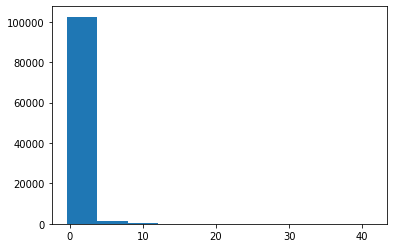

0         0.073014
1        -0.237539
2        -0.392816
3        -0.159901
4        -0.392816
            ...   
103899   -0.392816
103900   -0.392816
103901   -0.030504
103902   -0.392816
103903   -0.392816
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64


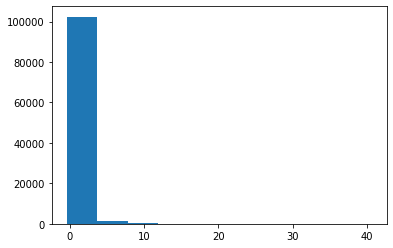

In [8]:
print(stats.zscore(age))
plt.hist(stats.zscore(age))
plt.show()

print(stats.zscore(flight_distance))
plt.hist(stats.zscore(flight_distance))
plt.show()

print(stats.zscore(departure))
plt.hist(stats.zscore(departure))
plt.show()

print(stats.zscore(arrival))
plt.hist(stats.zscore(arrival))
plt.show()



### Heatmap

<AxesSubplot:>

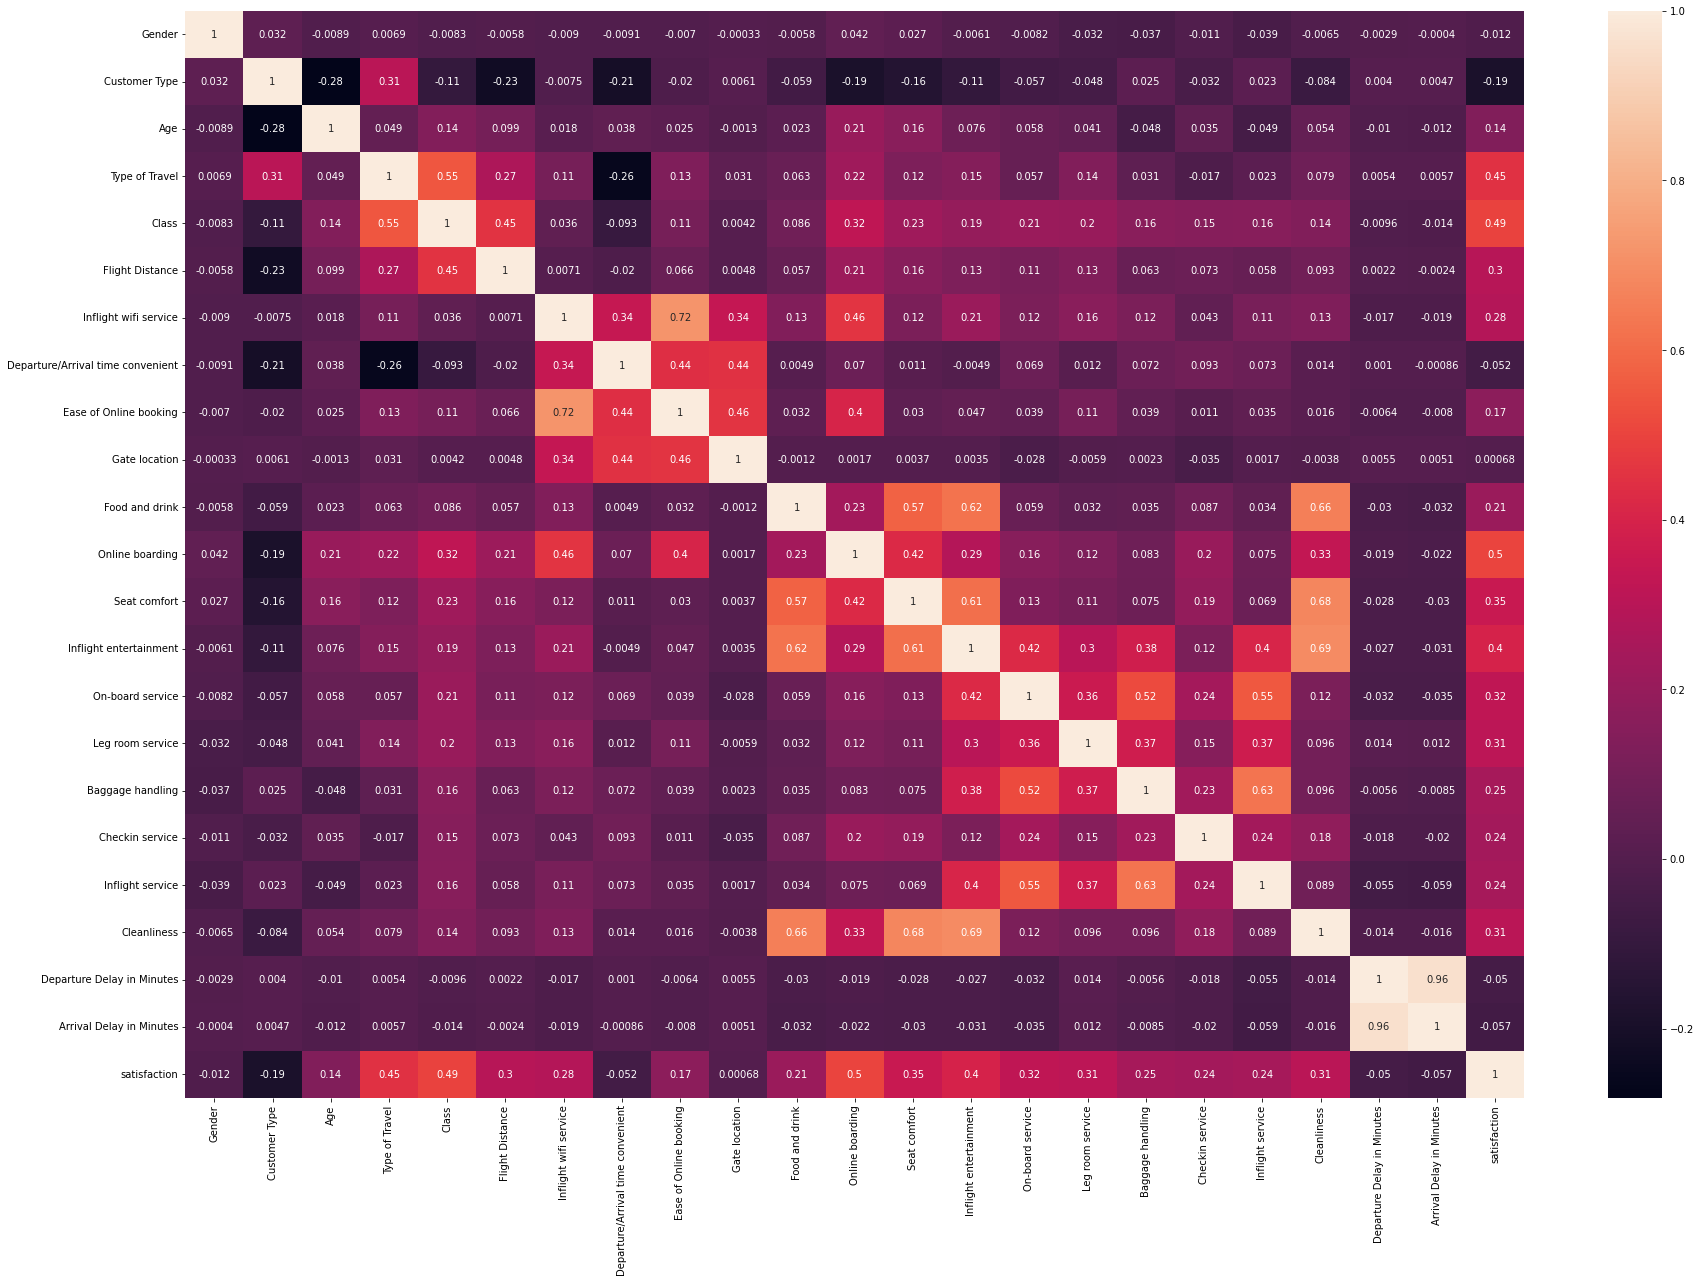

In [16]:
import seaborn as sns

plt.figure(figsize = (30,20))

sns.heatmap(data.corr(), annot=True)

### Scatter Matrix

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Flight Distance', ylabel='Age'>,
        <AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Age'>,
        <AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Flight Distance'>,
        <AxesSubplot:xlabel='Flight Distance', ylabel='Flight Distance'>,
        <AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Flight Distance'>,
        <AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Flight Distance'>],
       [<AxesSubplot:xlabel='Age', ylabel='Departure Delay in Minutes'>,
        <AxesSubplot:xlabel='Flight Distance', ylabel='Departure Delay in Minutes'>,
        <AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Departure Delay in Minutes'>,
        <AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>],
       [<AxesSubplot:xlabel='Age', ylabel='Arrival Delay in Minutes'>,
        <AxesSubpl

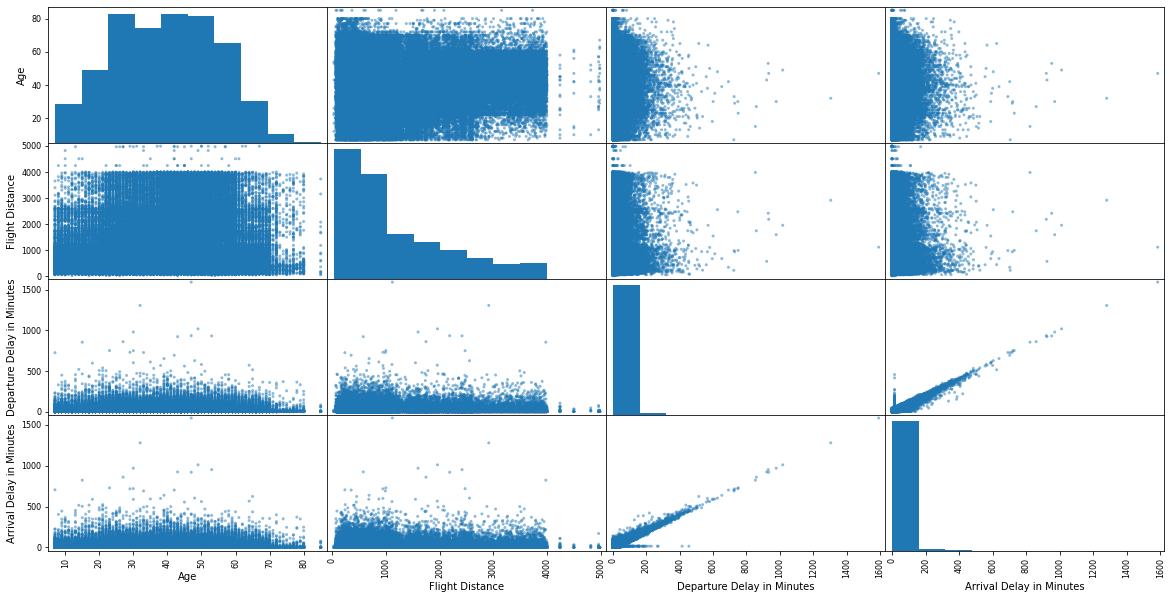

In [14]:
scatter_data = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes" ]

scatter_matrix(data[scatter_data], figsize=(20,10))